<a href="https://colab.research.google.com/github/Dennieeeee/COVID19-Pandemic/blob/master/COVID19_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [62]:
file='https://raw.githubusercontent.com/Dennieeeee/COVID19-Pandemic/master/covid19_unemployment_2020'
#file2 is the one after outliers are removed
file2 = 'https://raw.githubusercontent.com/Dennieeeee/COVID19-Pandemic/master/COVID19_unemp_v2'
df=pd.read_csv(file2)

# Columns
- ALAND: Area of Land (square meters)
- AWATER: Area of Water (square meters)
- NAME: City Name
- State: State
- LaborForce_01Month: Count of people within the US labor force, 1 month prior to current
- Employed_01Month: Count of employed population, 1 month prior to current
- Unemployed_01Month: Count of unemployed population, 1 month prior to current
- PctUnemployed_01Month: Percent unemployed population, 1 month prior to current
- CurrentMonth: Month and year, most current month offered by BLS
- vulnerability_index: Vulnerability Index
- rank_cvi: Rank
- fips_cvi: Fips

In [44]:
df.head()

,Unnamed: 0,State,NAME,LaborForce_01Month,Employed_01Month,Unemployed_01Month,PctUnemployed_01Month,percent_employed
0,0,Alabama,Autauga County,25835.0,25114.0,721.0,2.8,0.972092
1,1,Alabama,Baldwin County,96391.0,93782.0,2609.0,2.7,0.972933
2,2,Alabama,Barbour County,8537.0,8221.0,316.0,3.7,0.962985
3,3,Alabama,Bibb County,8617.0,8348.0,269.0,3.1,0.968783
4,4,Alabama,Blount County,25103.0,24421.0,682.0,2.7,0.972832


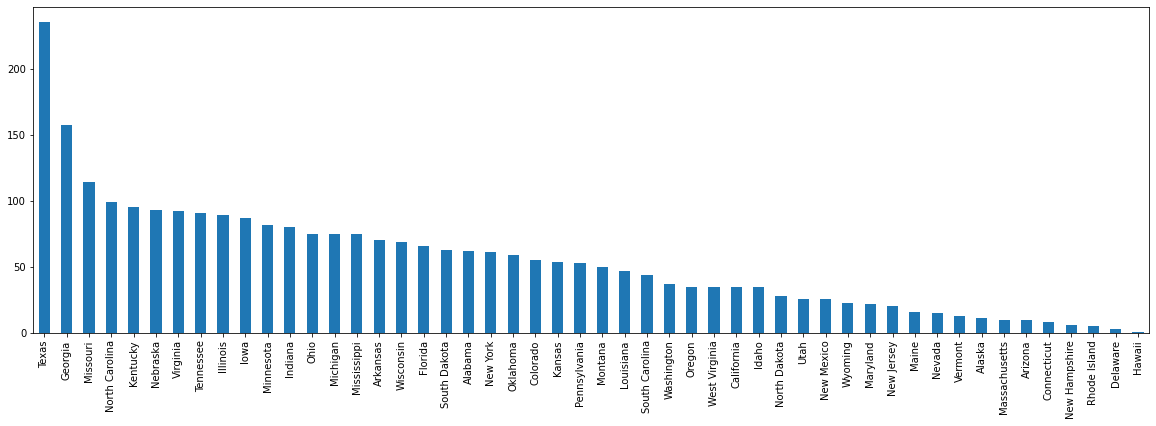

In [46]:
df['State'].value_counts().plot(kind='bar',figsize=(20,6))

In [59]:
df.describe()

,Unnamed: 0,LaborForce_01Month,Employed_01Month,Unemployed_01Month,PctUnemployed_01Month,percent_employed
count,2712.000000,2.712000e+03,2.712000e+03,2712.000000,2712.000000,2712.000000
mean,1570.270280,5.432668e+04,5.190552e+04,2421.162611,4.582264,0.954184
std,891.335722,1.774980e+05,1.683569e+05,9415.910158,1.263020,0.012634
min,0.000000,2.080000e+02,1.970000e+02,7.000000,2.600000,0.921524
25%,777.750000,5.336250e+03,5.094000e+03,241.000000,3.600000,0.945984
50%,1583.500000,1.263350e+04,1.203250e+04,562.000000,4.400000,0.955895
75%,2354.250000,3.398625e+04,3.212175e+04,1487.500000,5.400000,0.964087
max,3089.000000,4.996564e+06,4.669061e+06,327503.000000,7.800000,0.974497


In [60]:
#Find out the average and median unemployment for each state
df.groupby('State').agg(['mean','median']).head()

Unnamed: 0         ... percent_employed          
                  mean median  ...             mean    median
State                          ...                           
Alabama      31.387097   30.5  ...         0.965403  0.968247
Alaska       79.818182   79.0  ...         0.943317  0.950241
Arizona     101.800000  101.5  ...         0.934307  0.934550
Arkansas    147.828571  148.5  ...         0.944531  0.946072
California  211.457143  213.0  ...         0.948935  0.950853

[5 rows x 12 columns]

In [61]:
df.head(2)

,Unnamed: 0,State,NAME,LaborForce_01Month,Employed_01Month,Unemployed_01Month,PctUnemployed_01Month,percent_employed
0,0,Alabama,Autauga County,25835.0,25114.0,721.0,2.8,0.972092
1,1,Alabama,Baldwin County,96391.0,93782.0,2609.0,2.7,0.972933


# The answers to the questions below:
- Which counties have the highest Labour Force?
- Which counties have the highest unemployment rate?
- Which county has a higher COVID-19 Vulnerability Index (CVI)?
- What is the correlation between the CVI and the Unemployment rate?
- Which county has higher CVI among the top county with a higher unemployment rate?
- What are the changes in Landsat 8 OLI (Operational Land Imager) and TIRS (Thermal Infrared Sensor) images of that area?

In [51]:
# Top 5 counties with the highest labor force
index_top5 = list(df['LaborForce_01Month'].sort_values(ascending=False).index[:5])
laborForce_top5 = df1.loc[index_top5]

In [52]:
laborForce_top5

,State,NAME,LaborForce_01Month,Employed_01Month,Unemployed_01Month,PctUnemployed_01Month,percent_employed
165,California,Los Angeles County,4996564.0,4669061.0,327503.0,6.6,0.934454
524,Illinois,Cook County,2615106.0,2488391.0,126715.0,4.8,0.951545
78,Arizona,Maricopa County,2334396.0,2209663.0,124733.0,5.3,0.946567
2280,Texas,Harris County,2321037.0,2191290.0,129747.0,5.6,0.944100
171,California,Orange County,1587658.0,1528641.0,59017.0,3.7,0.962828


In [53]:
y=list(laborForce_top5.LaborForce_01Month)
x=[1,2,3,4,5]
t=list(laborForce_top5.NAME.values)

Text(0.5, 1.0, 'Top 5 Labor Forces')

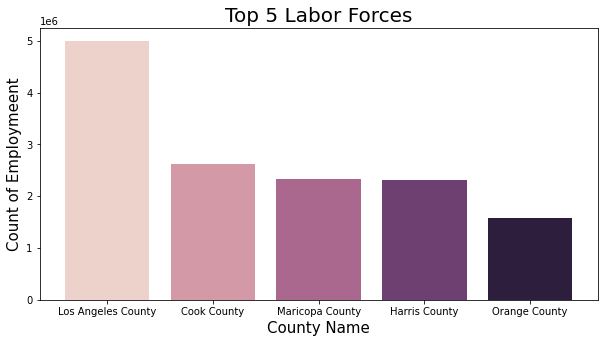

In [54]:
plt.figure(figsize=(10,5))
b_col = sns.cubehelix_palette(5,reverse=False) #reverse by default is False
plt.bar(x,y,color=b_col)
plt.xticks(x,t)
plt.xlabel('County Name',size=15)
plt.ylabel('Count of Employmeent',size=15)
plt.title('Top 5 Labor Forces',size=20)

In [55]:
#sorted by the unemployment in the county, decending order
unemp_index_top5 = list(df1.PctUnemployed_01Month.sort_values(ascending=False).index[:5])
unemp_top5 = df1.loc[unemp_index_top5]
unemp_top5

,State,NAME,LaborForce_01Month,Employed_01Month,Unemployed_01Month,PctUnemployed_01Month,percent_employed
954,Louisiana,St. James Parish,9343.0,8615.0,728.0,7.8,0.922081
2438,Utah,Uintah County,13571.0,12506.0,1065.0,7.8,0.921524
1941,Pennsylvania,Clinton County,18543.0,17093.0,1450.0,7.8,0.921803
1545,New Mexico,Cibola County,9070.0,8365.0,705.0,7.8,0.922271
480,Idaho,Benewah County,4129.0,3808.0,321.0,7.8,0.922257


In [56]:
y2=list(unemp_top5.PctUnemployed_01Month)
x2=[1,2,3,4,5]
t2=list(unemp_top5.NAME.values)

Text(0.5, 1.0, 'Counties with the highest unemployment rate')

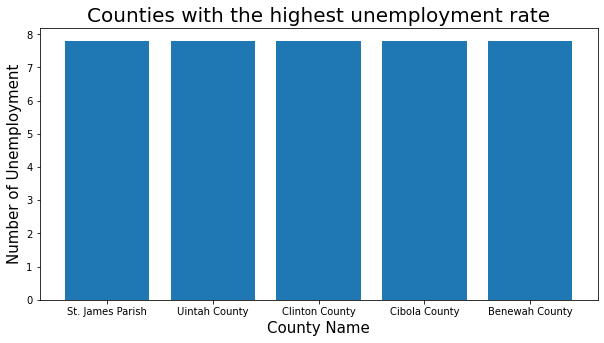

In [57]:
plt.figure(figsize=(10,5))
plt.bar(x2,y2)
plt.xticks(x2,t2)
plt.xlabel('County Name',size=15)
plt.ylabel('Number of Unemployment',size=15)
plt.title('Counties with the highest unemployment rate',size=20)